In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,NaN,0.067351,3.53370,0.469590,NaN,3.43440,2.79240,2.77630,NaN,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.1785,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.4824,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.5957,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,NaN,0.429700,1.63120,NaN,2.2711,0.37425,2.17860,1.31400,NaN,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.0747,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,NaN,3.100400,1.34610,1.377300,2.2887,NaN,2.39610,2.46350,NaN,2.461700,1.226700
797,NaN,-2.38430,2.031000,2.26460,3.341200,1.5370,1.22560,0.74027,NaN,1.34330,NaN,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.4243,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	26
float64		column 2	131
float64		column 3	0
float64		column 4	13
float64		column 5	39
float64		column 6	13
float64		column 7	39
float64		column 8	13
float64		column 9	66
float64		column 10	65
float64		column 11	40
float64		column 12	26


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,774.000000,669.000000,800.000000,787.000000,761.000000,787.000000,761.000000,787.000000,734.000000,735.000000,760.000000,774.000000
mean,1.503735,1.231632,1.981231,1.931293,1.990930,1.998605,1.963172,1.992609,1.998445,1.997511,1.960517,1.952032
std,2.747011,3.619402,1.146890,1.169189,1.168811,1.143439,1.166670,1.136358,1.143859,1.154059,1.178656,1.121933
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.441705,-1.335400,1.020375,0.920625,0.976710,0.984420,0.950300,0.968600,1.056375,1.031700,0.907012,0.967128
50%,0.969530,0.501530,1.968150,1.891200,2.035700,1.998000,2.001000,1.994300,1.994150,2.014600,1.940650,1.940650
75%,3.972100,4.505100,2.925475,2.941050,2.972800,3.006100,2.983200,2.929500,3.006850,2.996450,3.038575,2.863575
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

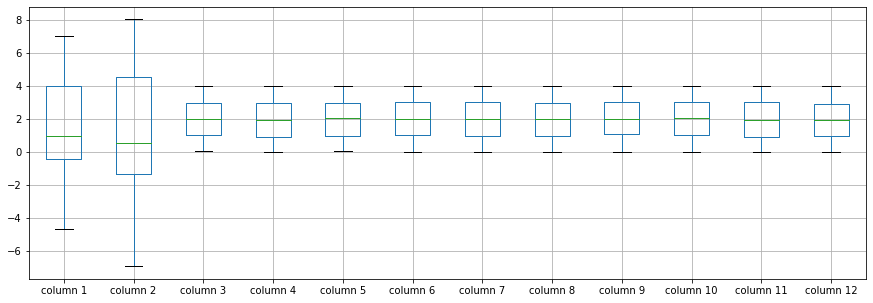

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1     1.503735
column 2     1.231632
column 3     1.981231
column 4     1.931293
column 5     1.990930
column 6     1.998605
column 7     1.963172
column 8     1.992609
column 9     1.998445
column 10    1.997511
column 11    1.960517
column 12    1.952032
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.448058,-0.023917,-0.002095,0.037817,0.041709,0.001812,0.010022,-0.020381,-0.011186,0.016786,0.022869
column 2,-0.448058,1.000000,0.001563,-0.022632,-0.007005,0.007597,0.029028,-0.012943,0.042490,-0.030944,-0.060601,0.026378
column 3,-0.023917,0.001563,1.000000,-0.035564,0.072043,0.000814,0.025491,-0.009925,-0.000762,-0.003288,-0.032214,0.023063
column 4,-0.002095,-0.022632,-0.035564,1.000000,-0.000474,-0.027577,0.042889,0.035788,-0.040829,0.043323,0.050451,-0.015304
column 5,0.037817,-0.007005,0.072043,-0.000474,1.000000,0.058323,0.010527,-0.000081,-0.023784,-0.000383,-0.042676,0.003893
column 6,0.041709,0.007597,0.000814,-0.027577,0.058323,1.000000,-0.055069,0.026847,0.032839,0.004585,-0.047165,-0.003651
column 7,0.001812,0.029028,0.025491,0.042889,0.010527,-0.055069,1.000000,-0.042745,-0.010736,-0.071770,-0.017001,-0.004457
column 8,0.010022,-0.012943,-0.009925,0.035788,-0.000081,0.026847,-0.042745,1.000000,-0.074463,-0.055693,-0.000653,-0.036554
column 9,-0.020381,0.042490,-0.000762,-0.040829,-0.023784,0.032839,-0.010736,-0.074463,1.000000,0.042788,-0.002484,-0.024859
column 10,-0.011186,-0.030944,-0.003288,0.043323,-0.000383,0.004585,-0.071770,-0.055693,0.042788,1.000000,-0.078423,0.049454


In [29]:
#column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
#df = pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AE_1.xlsx', header=None,names=column_names)


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [12,12+30,12+30+30,12+30+30+30,12+30+30+30,12+30+30+30+30+30,12+30+30+30+30,12+30+30+30,12+30+30,12+30,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.956287231445312
Epoch: 1 , loss: 27.815099449157714
Epoch: 2 , loss: 27.520114669799806
Epoch: 3 , loss: 25.471176414489747
Epoch: 4 , loss: 22.03055030822754
Epoch: 5 , loss: 21.53342227935791
Epoch: 6 , loss: 21.01307819366455
Epoch: 7 , loss: 20.723942794799804
Epoch: 8 , loss: 20.554769821166992
Epoch: 9 , loss: 20.16459888458252
Epoch: 10 , loss: 20.231434745788576
Epoch: 11 , loss: 20.097126502990722
Epoch: 12 , loss: 19.68674041748047
Epoch: 13 , loss: 19.686990089416504
Epoch: 14 , loss: 19.442054176330565
Epoch: 15 , loss: 19.30104362487793
Epoch: 16 , loss: 19.296799774169923
Epoch: 17 , loss: 19.1790092086792
Epoch: 18 , loss: 19.067948150634766
Epoch: 19 , loss: 19.231357421875
Epoch: 20 , loss: 18.761812591552733
Epoch: 21 , loss: 19.123559188842773
Epoch: 22 , loss: 18.946777591705324
Epoch: 23 , loss: 18.9856778717041
Epoch: 24 , loss: 18.801609573364257
Epoch: 25 , loss: 18.688063106

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.405024,0.0,0.0,0.00000,0.363377,0.000000,0.0,0.000000,-0.691031,0.000000,0.0
1,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.000000,0.387510,0.0,0.0,-2.40332,0.000000,0.000000,0.0,0.000000,0.080185,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
796,0.000000,4.612700,0.0,0.0,0.00000,0.000000,0.696241,0.0,0.000000,-0.581445,0.000000,0.0
797,-1.912462,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,-0.411289,0.000000,0.443467,0.0
798,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [26]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(52.098642906178, 248.22200824735242)

In [27]:
NRMS=numerator/denominator
NRMS


0.20988728305776122

In [20]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.566364,0.067351,3.53370,0.469590,1.042457,3.434400,2.79240,2.776300,1.008069,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.92160,0.424720,1.178500,1.680200,1.38880,3.216700,2.923600,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.06500,1.567600,1.482400,0.921600,2.64240,1.518700,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.95630,2.787000,2.595700,2.893300,1.53750,0.999420,3.659300,0.618250,3.265800
4,0.098830,0.621690,0.429700,1.63120,1.150780,2.271100,0.374250,2.17860,1.314000,1.143385,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.55612,0.070769,2.074700,0.803040,3.22290,3.493300,1.325500,3.231100,0.005387
796,3.466600,0.578100,3.100400,1.34610,1.377300,2.288700,1.092371,2.39610,2.463500,1.086055,2.461700,1.226700
797,1.432338,-2.384300,2.031000,2.26460,3.341200,1.537000,1.225600,0.74027,2.084111,1.343300,2.065967,1.585300
798,3.441400,-5.216300,1.577000,1.84400,1.098700,3.424300,0.810810,3.72700,1.187900,0.951120,1.884500,1.143700


In [28]:
imputations[-1].to_excel("4-gauss_AG_5(imp).xlsx", index=False, header=False)